## Introduction 

---
**Project Big Data & Cloud Computing**

---
Group members:
- Ettoré Hidoux
- Clément Mathé
- Yasmine Diouri


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Workspace Configuration

**Before starting:**

You need to install Basemap. You have to do it at each new session.

In [ ]:
%%bash
apt-get install libgeos-3* libgeos-dev
pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
libgeos-3.6.2 is already the newest version (3.6.2-1build2).
libgeos-3.6.2 set to manually installed.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (190 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144793 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=1217561

**Goal of this practice:**

The goal is to use a cloud computing platform (the Google Cloud Platform). We will use big data tools on Colab to process large datasets. These data are real satellite observations of the ocean (5 years).

**Evaluation of this practice:**

I will evaluate 3 main components.

The first is the quality of the code. It must be concise and well written. The goal is to manipulate big data tools provided by the Google Cloud Platform (such as BigQuery).

The second is the quality of the outputs. Never forget that you are dealing with physical variables evolving in space and time. You must use maps and time series. You must also write the units (e.g., °C, m).

The third thing is the discussion about your results. Again, remember that you are dealing with oceanographic data. They have a physical meaning and you should be able to comment the outputs.

**Import libraries:**

- matplotlib (2D plotting)
- pylab (scientific computing)
- basemap (plotting 2D data on maps)
- scikit-learn (machine learning)
- pandas (data structures and data analysis tools)

In [ ]:
%matplotlib inline
%pylab inline
from mpl_toolkits.basemap import Basemap
import sklearn
import pandas as pd
from scipy.stats.mstats import zscore
import warnings
warnings.filterwarnings("ignore") # disable warnings
pylab.rcParams['figure.figsize']=(20,20) # graph size

Populating the interactive namespace from numpy and matplotlib


**Declare functions:**
- plot_im (plot satellite image with geographic coordinates)
- plot_ts (plot time series)

In [ ]:
# function to plot images  
def plot_im(lon,lat,im,size_points,var_name):
    
    # transform to arrays (just in case)
    lon=array(lon)
    lat=array(lat)
    im=array(im)
    
    if max(lon)-min(lon)<100:
      # Mercator projection (for small zone)
      m=Basemap(projection='merc',llcrnrlat=nanmin(lat),urcrnrlat=nanmax(lat),\
                llcrnrlon=nanmin(lon),urcrnrlon=nanmax(lon),lat_0=(nanmax(lat)+nanmin(lat))*0.5,\
                lon_0=(nanmax(lon)+nanmin(lon))*0.5,resolution='l')
    else:
      # Orthogonal projection (for large zone)
      m=Basemap(projection='ortho',lat_0=0,lon_0=0,resolution='l')
    # you can use other projections (see https://matplotlib.org/basemap/users/mapsetup.html)
    
    # transform (lon,lat) to (x,y)
    x,y=m(lon,lat)

    # plot
    im=ma.masked_where(isnan(im),im)
    res=m.scatter(x,y,size_points,im,'o',alpha=1,cmap='jet',lw=0)
    m.drawcoastlines()
    m.fillcontinents()
    parallels = linspace(nanmin(lat),nanmax(lat),15)
    meridians = linspace(nanmin(lon),nanmax(lon),15)
    #m.drawparallels(parallels,labels=[1,0,0,1],fontsize=10)
    #m.drawmeridians(meridians,labels=[1,0,0,1],fontsize=10)
    cb=m.colorbar(res,location="right")
    cb.set_label(var_name,fontsize=15)
    
# function to plot time series
def plot_ts(time,SST,line_type,var_name):

    # plot
    plot_date(time,SST,line_type)
    xlabel('Time',fontsize=15)
    ylabel(var_name,fontsize=15)

**The satellite database:**

In this practice, we use 5 years (2011-2015) of satellite observations of the global ocean. We use daily data with 25km spatial resolution. We study the Sea Surface Temperature (SST, in degrees) and the Sea Surface Height (SSH, in meters). SST and SSH are indexed in space (lon, lat) and time. The full database is stored in csv files and is quite large (~50Go).

**Part 1) Manipulation of a small dataset using pandas:**

We start to work on a small database (only the 10 first days in 2015, ~250Mo) and we will perform some basic statistics. The idea is to show that even if you use a small sample, basic data manipulation without big data tools is difficult, time and resource consuming.

After copying the dataset "data_sst_ssh_2015_small.csv" on your Colab environment, we read it using pandas (easy-to-use data structures and data analysis tools). We use the *groupby* and *mean* pandas functions to: map the global SST and SSH (using *plot_im*), plot the mean SST and SSH time series (using *plot_ts*).

In [ ]:
# read dataframe
data = pd.read_csv('data_sst_ssh_2015_small.csv', header=None, names=['lat', 'lon', 'sst', 'time', 'ssh'])

In [ ]:
# sample of the dataset
data

lat      lon  sst      time     ssh
0       -77.625  322.625 -1.8  735600.0 -1.2535
1       -77.375  319.625 -1.8  735600.0 -1.2179
2       -77.375  319.875 -1.8  735600.0 -1.2214
3       -77.375  320.125 -1.8  735600.0 -1.2247
4       -77.375  320.375 -1.8  735600.0 -1.2285
...         ...      ...  ...       ...     ...
5338138  81.875   29.375 -1.8  735609.0 -0.3426
5338139  81.875   29.625 -1.8  735609.0 -0.3394
5338140  81.875   29.875 -1.8  735609.0 -0.3377
5338141  81.875   30.125 -1.8  735609.0 -0.3370
5338142  81.875   30.375 -1.8  735609.0     NaN

[5338143 rows x 5 columns]

In [ ]:
# statistics of the dataset
data.describe()

lat           lon           sst          time           ssh
count  5.338143e+06  5.338143e+06  5.338143e+06  5.338143e+06  5.338142e+06
mean  -1.140247e+01  1.932643e+02  1.646710e+01  7.356045e+05  3.436659e-01
std    3.845651e+01  1.003294e+02  1.041889e+01  2.871929e+00  7.254869e-01
min   -7.762500e+01  1.250000e-01 -1.800000e+00  7.356000e+05 -1.520300e+00
25%   -4.462500e+01  1.123750e+02  6.450000e+00  7.356020e+05 -3.170000e-02
50%   -1.587500e+01  1.971250e+02  1.950000e+01  7.356050e+05  5.697000e-01
75%    1.737500e+01  2.733750e+02  2.595000e+01  7.356070e+05  8.530000e-01
max    8.437500e+01  3.598750e+02  3.345000e+01  7.356090e+05  1.898000e+00

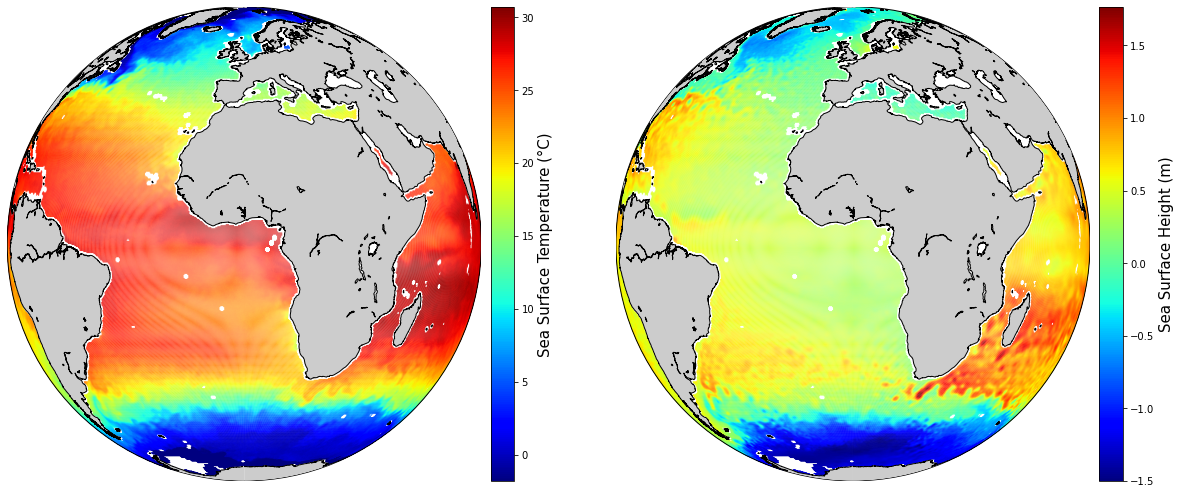

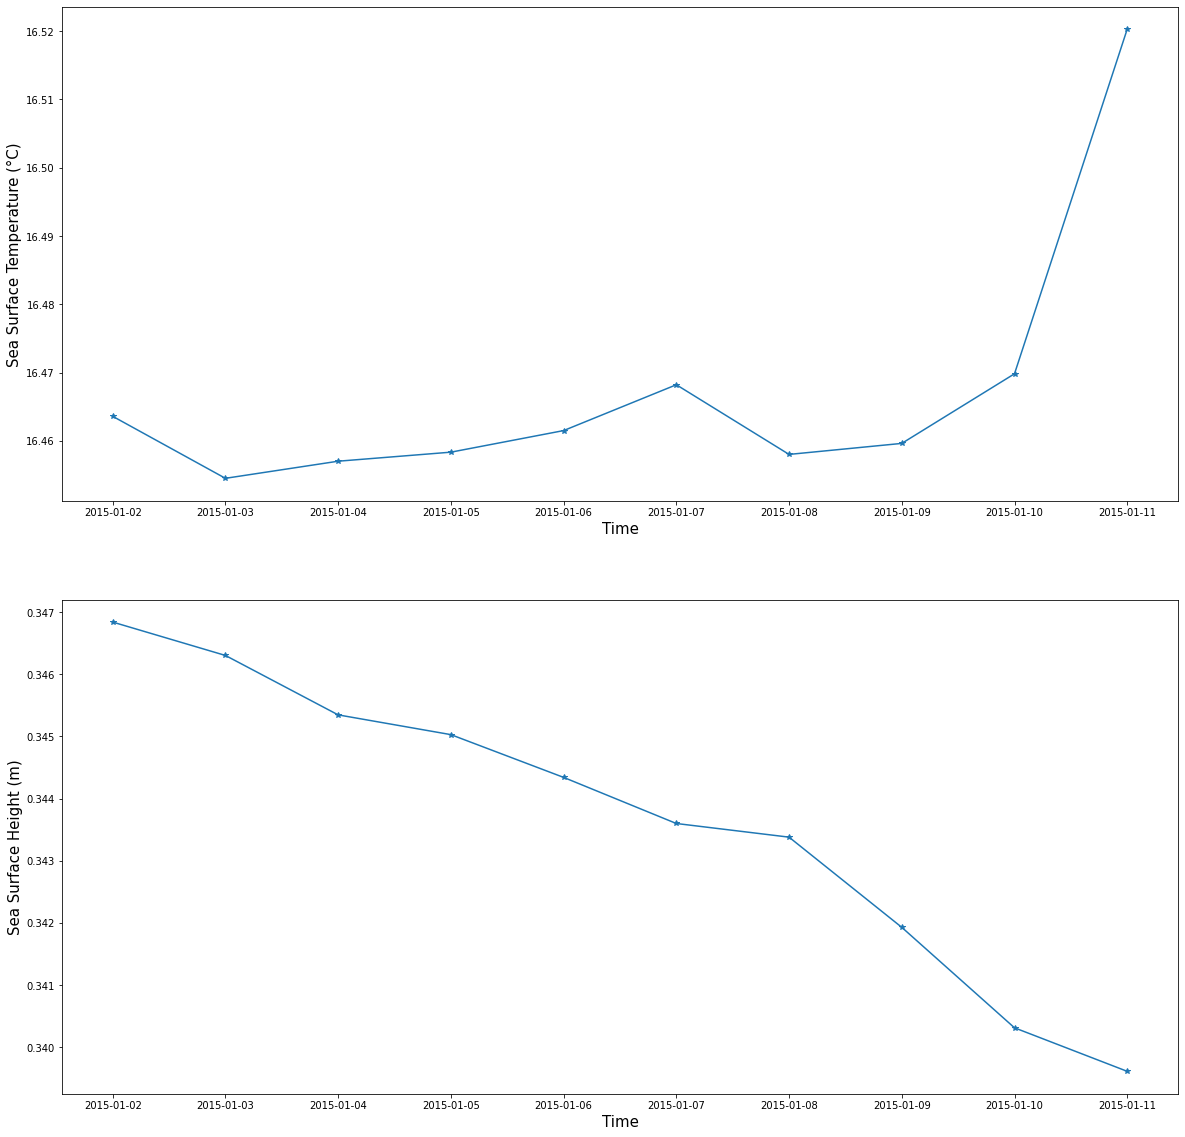

In [ ]:
# plot global SST and SSH maps
sst_im=data.groupby(['lon','lat'])['sst'].mean()
ssh_im=data.groupby(['lon','lat'])['ssh'].mean()
lon_im=data.groupby(['lon','lat'])['lon'].mean()
lat_im=data.groupby(['lon','lat'])['lat'].mean()
figure()
subplot(1,2,1)
plot_im(lon_im,lat_im,sst_im,1,'Sea Surface Temperature (°C)')
subplot(1,2,2)
plot_im(lon_im,lat_im,ssh_im,1,'Sea Surface Height (m)')

# plot global SST and SSH time series
sst_ts=data.groupby(['time'])['sst'].mean()
ssh_ts=data.groupby(['time'])['ssh'].mean()
time_ts=data.groupby(['time'])['time'].mean()
figure()
subplot(2,1,1)
plot_ts(time_ts,sst_ts,'-*','Sea Surface Temperature (°C)')
subplot(2,1,2)
plot_ts(time_ts,ssh_ts,'-*','Sea Surface Height (m)')

Now, we consider only a small region of the Globe: the Mediterranean Sea. As previously, we plot the mean time series and maps of SST and SSH. We also plot the SSH as a function of SST and the 2 distributions using histograms.

Text(0, 0.5, 'Sea Surface Height (m)')

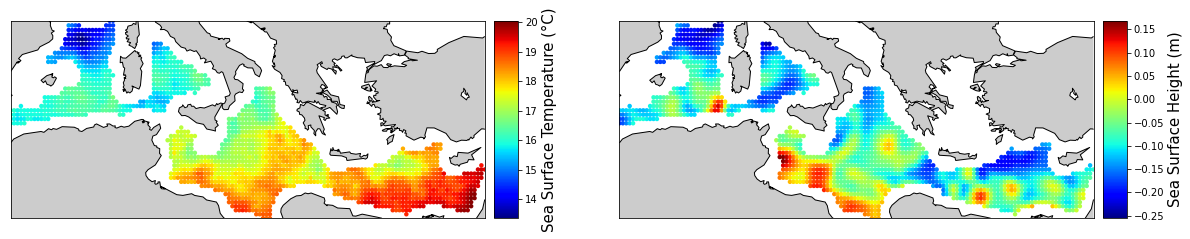

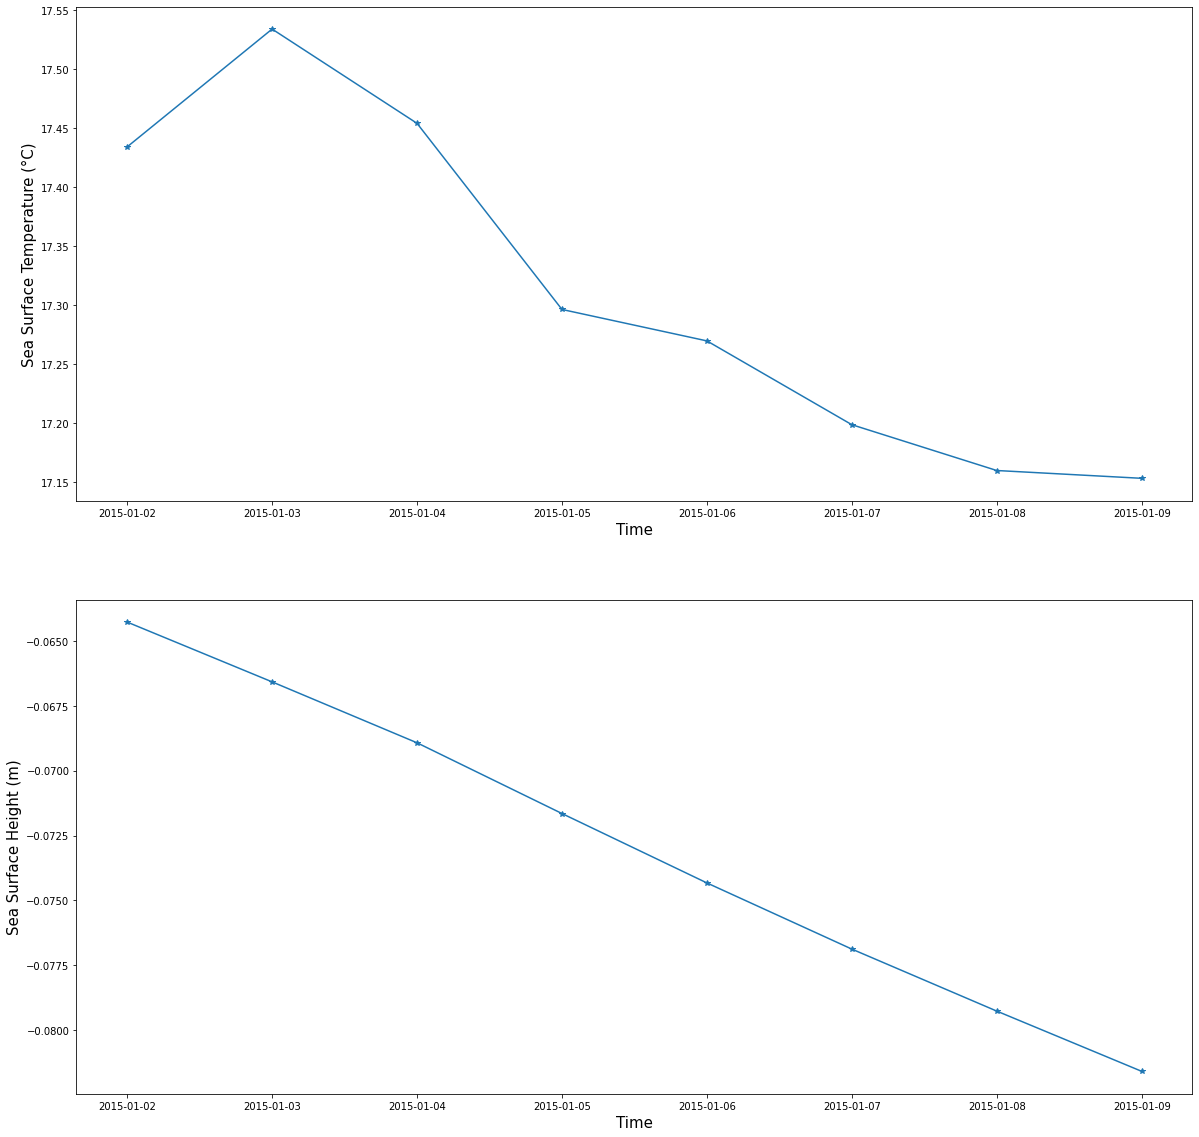

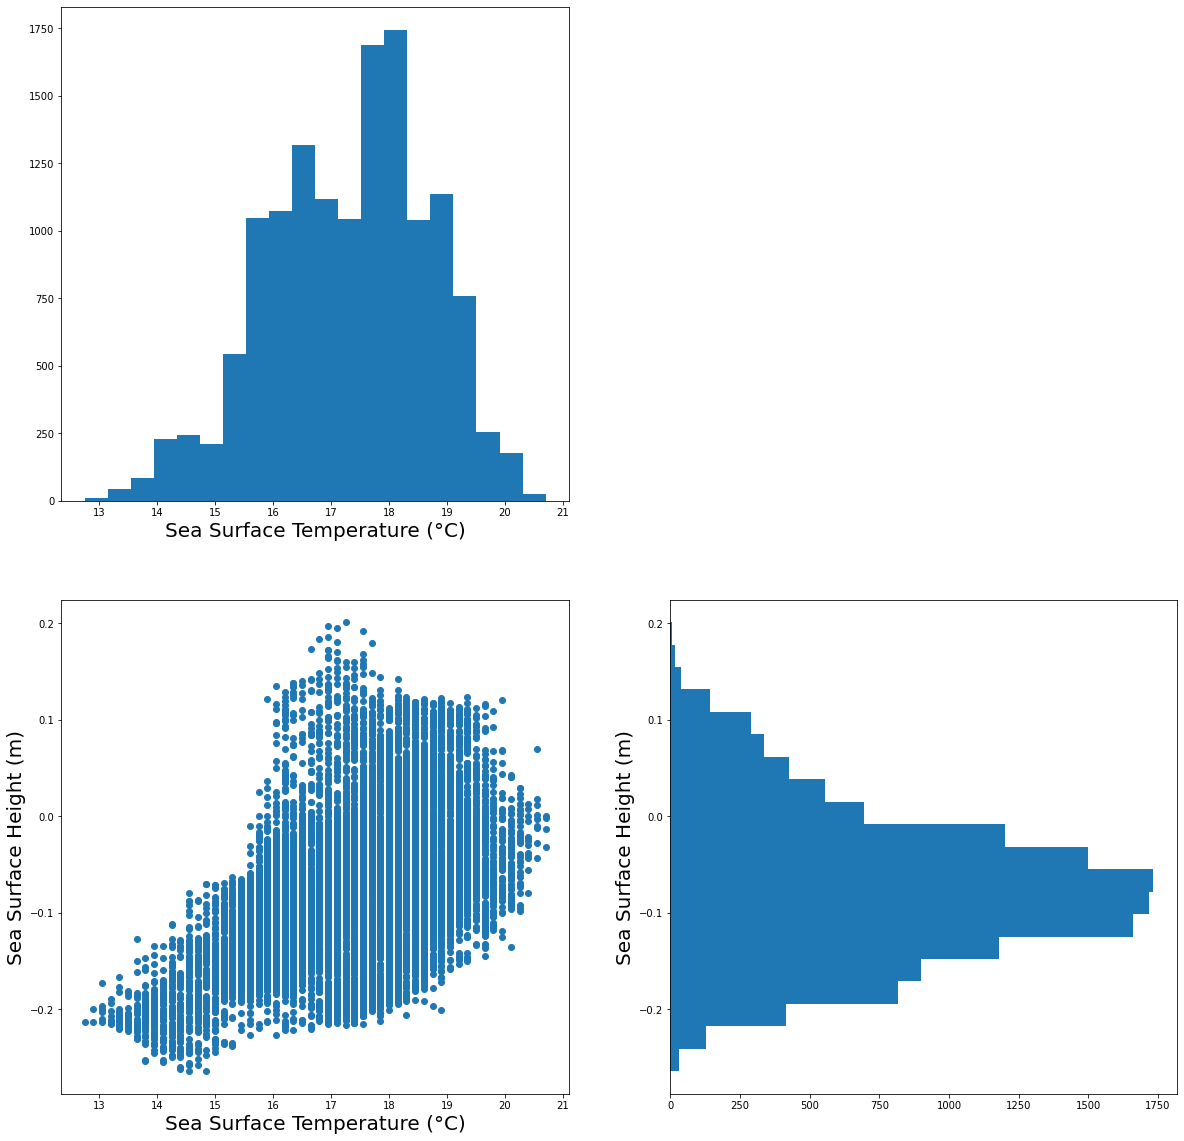

In [ ]:
# data selection
data_med=data[(data.lon>0) & (data.lon<35) & (data.lat>30) & (data.lat<45)]

# plot SST and SSH maps
sst_med_im=data_med.groupby(['lon','lat'])['sst'].mean()
ssh_med_im=data_med.groupby(['lon','lat'])['ssh'].mean()
lon_med_im=data_med.groupby(['lon','lat'])['lon'].mean()
lat_med_im=data_med.groupby(['lon','lat'])['lat'].mean()
figure()
subplot(1,2,1)
plot_im(lon_med_im,lat_med_im,sst_med_im,20,'Sea Surface Temperature (°C)')
subplot(1,2,2)
plot_im(lon_med_im,lat_med_im,ssh_med_im,20,'Sea Surface Height (m)')

# plot SST and SSH time series
sst_med_ts=data_med.groupby(['time'])['sst'].mean()
ssh_med_ts=data_med.groupby(['time'])['ssh'].mean()
time_med_ts=data_med.groupby(['time'])['time'].mean()
figure()
subplot(2,1,1)
plot_ts(time_med_ts,sst_med_ts,'-*','Sea Surface Temperature (°C)')
subplot(2,1,2)
plot_ts(time_med_ts,ssh_med_ts,'-*','Sea Surface Height (m)')

# plot hist(SST), hist(SSH), SSH~SST
figure()
subplot(2,2,1)
hist(data_med.sst, 20)
xlabel('Sea Surface Temperature (°C)', size=20)
subplot(2,2,4)
hist(data_med.ssh, 20, orientation=u'horizontal')
ylabel('Sea Surface Height (m)', size=20)
subplot(2,2,3)
scatter(data_med.sst, data_med.ssh)
xlabel('Sea Surface Temperature (°C)', size=20)
ylabel('Sea Surface Height (m)', size=20)

**Remark:**

The dataset used above is small (250Mo) and corresponds only to 10 days. Now, we want to manipulate the full database of 5 years (50Go) using big data tools. This database is stored in the Google Cloud Platform.

**Part 2) Manipulation of the full database using BigQuery**

First, we have to connect to the Google Cloud Platform. using the following command. You will have to enter the login "bigdataocean2020@gmail.com" and password "bdoimt2020_mce". Do it only once.



# Questions


In [ ]:
from google.colab import auth
auth.authenticate_user()

The Google Cloud Platform has set up a tool to handle large databases. This is called "BigQuery" and it is based on the NoSQL ("Not only SQL") language. The syntax in BigQuery is very similar to the pandas example given in Part 1). For instance, in the example below, we plot the mean SST map in the Mediterranean Sea over the period 2011-2015. The full 5-years dataset is stored in the BigQuery table *bdo2020.bdo2020.2011_2015*. The project is called *alert-ground-261008* (strange but you have to provide it). The result of the BigQuery request is stored in the *output* dataframe. 

In [ ]:
%%bigquery --project alert-ground-261008 output
SELECT lon, lat, AVG(sst) AS mean_sst
FROM bdo2020.bdo2020.2011_2015
WHERE lon>0 AND lon<35 AND lat>30 AND lat<45
GROUP BY lon, lat

In [ ]:
# sample of the dataframe
output

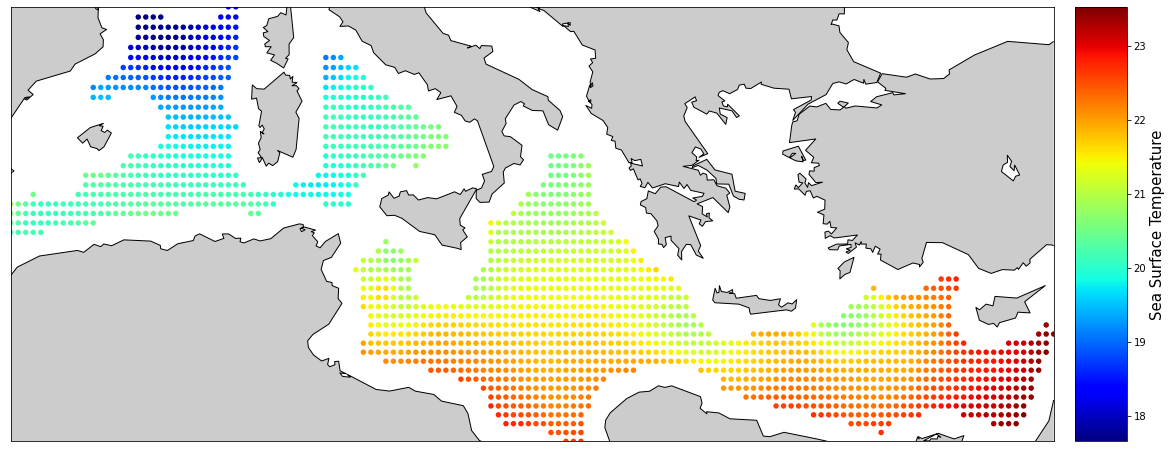

In [ ]:
plot_im(output.lon,output.lat,output.mean_sst,30,'Sea Surface Temperature')

SQL language is suitable to manipulate and compute basic statistics such as the mean, standard deviation, minimum, maximum, correlation, etc... Here you will find the list of basic functions: https://cloud.google.com/bigquery/docs/reference/legacy-sql?hl=fr.

It is also possible to use Machine Learning algorithms inside BigQuery. Here you will find a complete description of the possibilities: https://cloud.google.com/bigquery-ml/docs/bigqueryml-intro?hl=fr. Another solution (easiest way of doing) is to extract a small amount of data in BigQuery and then use scikit-learn: https://scikit-learn.org/stable/.

**Important note:** the tables stored in the Google Cloud Platform are not chronologically ordered. When dealing with time series, you will thus have to use *ORDER BY time* in your BigQuery requests.

**QUESTION 1**: Compute and plot the correlation map over the period 2011-2015 between SST and SSH in the Agulhas current, between longitudes (+15,+70) and latitudes (-50,-30).

In [ ]:
# Question 1
%%bigquery --project alert-ground-261008 output1
SELECT lon, lat, CORR(sst, ssh) AS corr
FROM bdo2020.bdo2020.2011_2015
WHERE lon>15 AND lon<70 AND lat>-50 AND lat<-30
GROUP BY lon, lat

In [ ]:
# sample of the dataframe
output1

In [ ]:
output1 = transpose(nan_to_num(output1))
output1

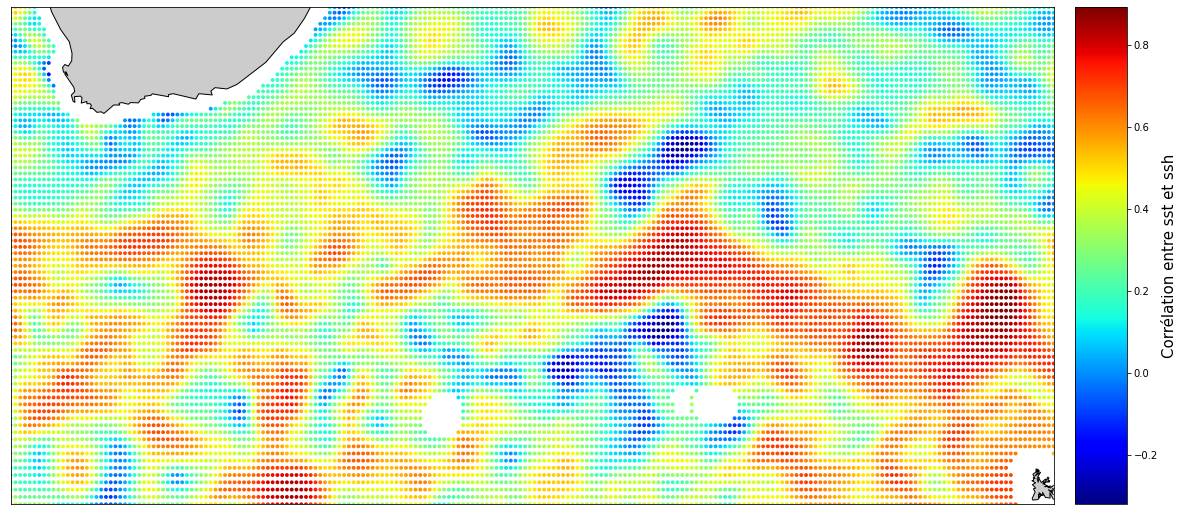

In [ ]:
plot_im(output1[0],output1[1],output1[2],15,'Corrélation entre sst et ssh (e.g.)')

COMMENT: Corrélation forte si entre 0.5 et 1 et entre -0.5 et -1. Ici couleur supérieur à jaune. Ce qui représente quand même la majeur partie de la carte. 

Les "trous" blancs correspondent aux zones où nous avions NaN. Ces zones correspondent en réalité aux îles (îles crozet) qui se trouvent au sud-est de l'Afrique du Sud. Cela explique pourquoi nous n'avions pas de données en ces points.



**QUESTION 2**: Plot the dealy mean and standard deviation time series of SST for the period 2011-2015 in the Equatorial Pacific, between longitudes (+180,+300) and latitudes (-20,+20). The mean SST time series is called the ENSO index and is used to identify El Nino and La Nina events.

In [ ]:
# Question 2
%%bigquery --project alert-ground-261008 output2
SELECT time, AVG(sst) as mean_sst, STDDEV(sst) as stdev
FROM bdo2020.bdo2020.2011_2015
WHERE lon>180 AND lon<300 AND lat>-20 AND lat<20
GROUP BY time
ORDER BY time

In [ ]:
# sample of the dataframe
output2

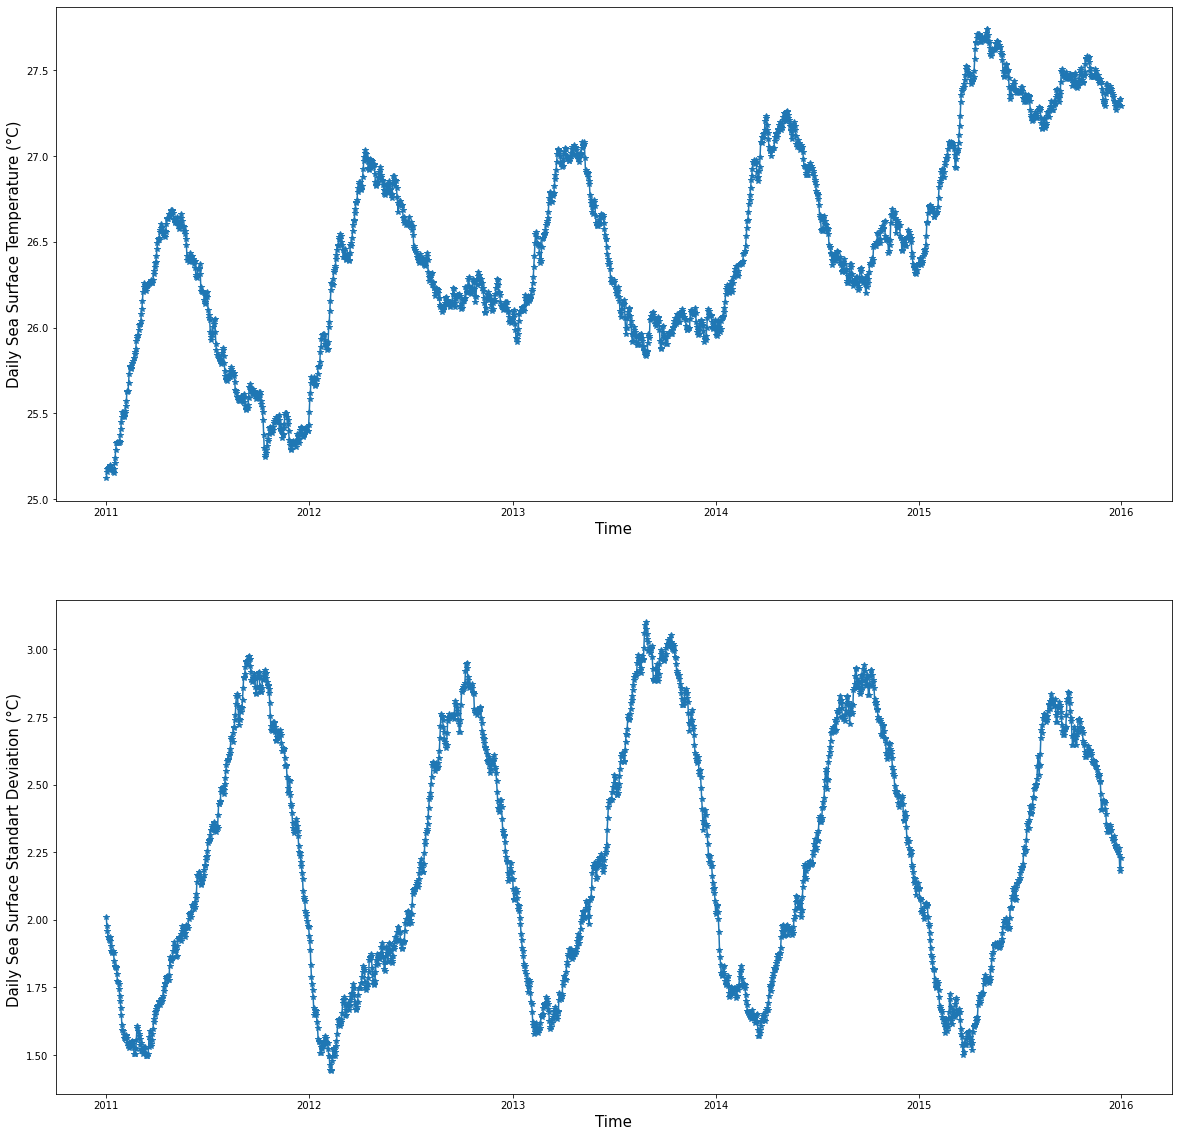

In [ ]:
# plot SST Mean and SST Stdev time series

subplot(2,1,1)
plot_ts(output2.time,output2.mean_sst,'-*','Daily Sea Surface Temperature (°C)')
subplot(2,1,2)
plot_ts(output2.time,output2.stdev,'-*','Daily Sea Surface Standart Deviation (°C) ')

COMMENT: 

El Nino et La Nina sont deux phénomènes climatiques que l'on peut qualifier "d'opposés" puisque le premier se caractèrise par des températures de surface des eaux de l'océan pacifique particulièrement élevées tandis que le second se caractèrise au contraire par des températures de surface basses.
Le premier graphe qui montre la moyenne journalière de la température de surface de la zone où se produisent ces deux phénomènes peut nous permettre d'en identifier les occurences. En effet, on remarque que la courbe est une oscillation quasi périodique (ce qui est assez logique puisque la température des eaux augmente durant le printemps puis diminue avec l'arrivée de l'automne). Cependant, sur l'année 2011-2012, le maximum et minimum de température atteints sont entre 0.5 et 1 degrès en dessous de ceux des 3 années suivantes qui sont eux même à plus de 0.5 degrès en dessous de ceux de l'année 2015-2016. Or la période 2011-2012 correspond bien à une occurence de La Nina tandis que 2015-2016 à celle de El Nino. La température de surface est donc un bon indicateur de ces deux phénomènes.

Le second graphe montre la variation de cette température de surface. Cette deuxième courbe présente des maximums périodiques qui avoisinnent les 3 degrès celcius et qui se produisent chaque année à la même période (début de l'automne) ce qui correspond à la chute de température des eaux. Puisque l'on s'intéresse aux températures de surface des eaux, celles-ci évoluent quasiment comme la température de l'air ambiant, c'est pourquoi d'un jour à l'autre la température de l'eau peut varier de 3 degrès.

**QUESTION 3**: Compute the dealy time series of SST over the period 2011-2015 in the Gulf of Mexico, between longitudes (+263,+281) and latitudes (+17,+35). In this region, there are a lot of hurricanes and they use the energy of the sea (hot waters) to get stronger. Thus, after a hurricane, we see a rapid decrease of the SST. Plot the time series of the difference of SST between 2 consecutive days and check that the negative peaks (below -0.4°C) correspond to well known hurricanes.


In [ ]:
# Question 3
%%bigquery --project alert-ground-261008 output3_1
SELECT time,
       AVG(sst) AS mean,
       AVG(sst) - LAG(AVG(sst))
       OVER (ORDER BY time) AS difference_previous_day,
FROM bdo2020.bdo2020.2011_2015
WHERE lon>263 AND lon<281 AND lat>17 AND lat<35
GROUP BY time
ORDER BY time

In [ ]:
# Question 3
%%bigquery --project alert-ground-261008 output3_2
SELECT time,
       AVG(difference_previous_day) OVER(
         ORDER BY time
         ROWS BETWEEN 1 PRECEDING AND 1 FOLLOWING
       ) AS avg_difference_previous_day
FROM (
  SELECT time,
         AVG(sst) AS mean,
         AVG(sst) - LAG(AVG(sst))
         OVER (ORDER BY time) AS difference_previous_day,
  FROM bdo2020.bdo2020.2011_2015
  WHERE lon>263 AND lon<281 AND lat>17 AND lat<35
  GROUP BY time
  ORDER BY time
)
ORDER BY time

In [ ]:
# Question 3
%%bigquery --project alert-ground-261008 output3_3
SELECT time, 
       SUM(difference_previous_day) OVER(
         ORDER BY time DESC
       ) AS cumulate_sum
FROM (
  SELECT time,
         AVG(sst) AS mean,
         AVG(sst) - LAG(AVG(sst))
         OVER (ORDER BY time) AS difference_previous_day,
  FROM bdo2020.bdo2020.2011_2015
  WHERE lon>263 AND lon<281 AND lat>17 AND lat<35
  GROUP BY time
  ORDER BY time
)
ORDER BY time
       

In [ ]:
# sample of the dataframe
output3_3

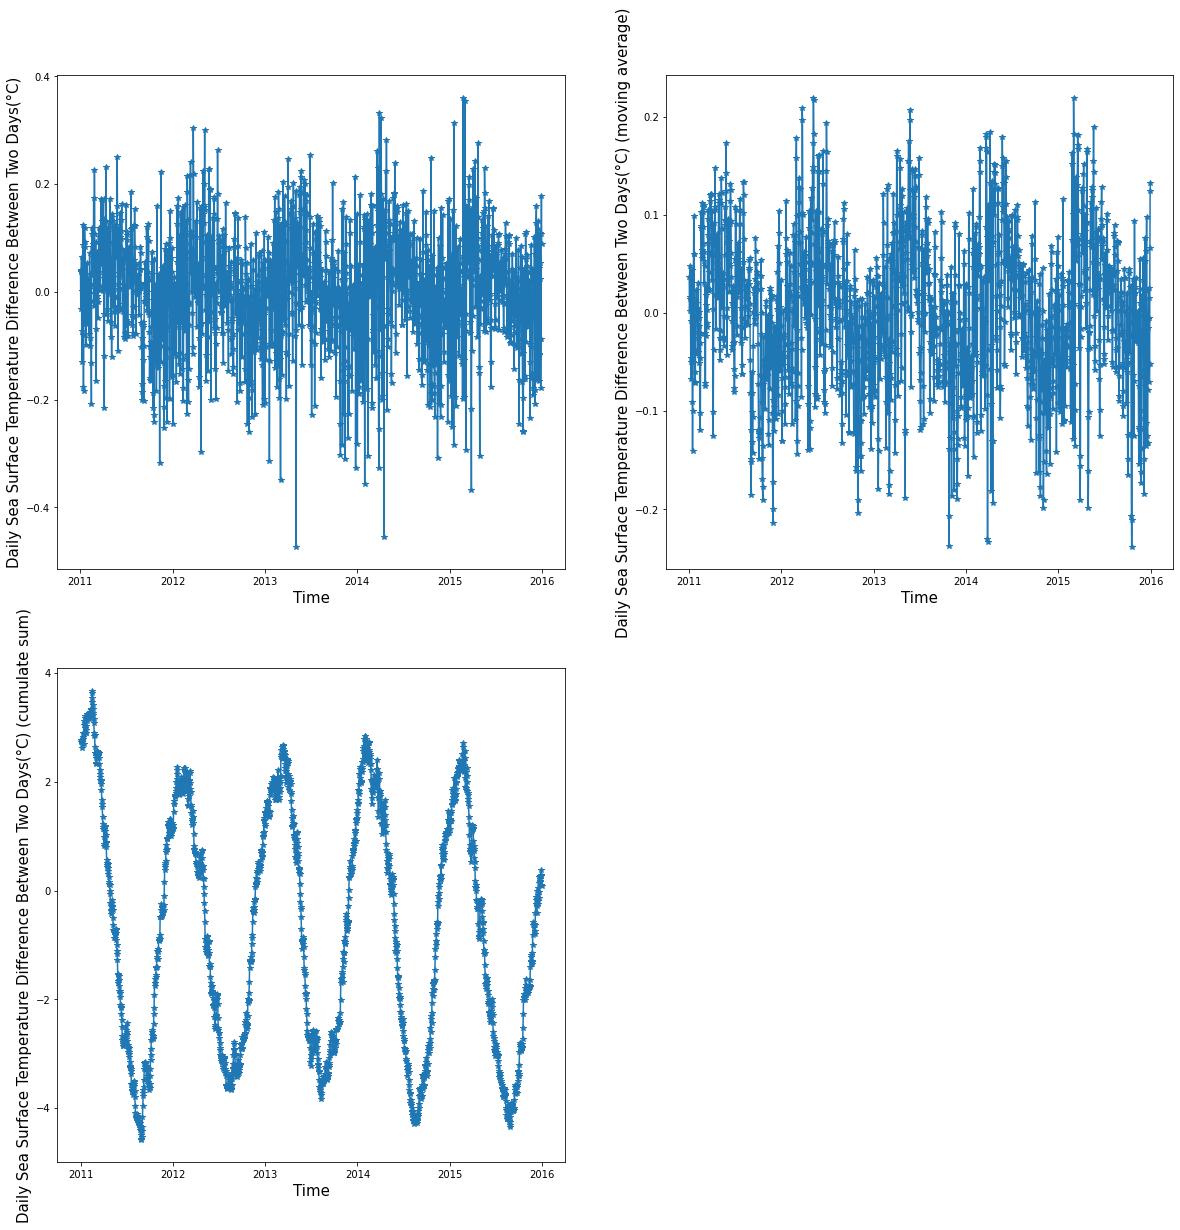

In [ ]:
# plot SST Diff time series
figure()
subplot(2,2,1)
plot_ts(output3_1.time,output3_1.difference_previous_day,'-*','Daily Sea Surface Temperature Difference Between Two Days(°C)')
#linear regression on each point
subplot(2,2,2)
plot_ts(output3_2.time,output3_2.avg_difference_previous_day,'-*','Daily Sea Surface Temperature Difference Between Two Days(°C) (moving average)')
#2011 + mean of diff between 2011 and 2100
subplot(2,2,3)
plot_ts(output3_3.time,output3_3.cumulate_sum,'-*','Daily Sea Surface Temperature Difference Between Two Days(°C) (cumulate sum)')


COMMENT: 
Nous avons recherché dans la littérature des dépressions climatiques dans le Golf du Mexique à ces périodes.

Du 7 au 12 septembre 2011, le Golf du Méxique a été frappé par l'Ouragan Nate dont l'intensité pouvait aller jusqu'à 180 km/h. Il y a l'ouragan Isaac en août 2012 et Manuel en sptembre 2013.
Dans le golf du méxique en 2014 il n'y a eu que la tempête Dolly qui n'est pas un gros ouragan.
En octobre 2015, il y a eu Patricia.


D'après le 1er graphe (différence), sur la période 2011-2015, on identifie 2 périodes où la température de surface de l'eau a chutée anormalement: en 2013 (mauvaise période) et 2014 (mauvaise période).

D'après le 2eme graphe (moyenne glissante), sur la période 2011-2015, on identifie 2 périodes où la température de surface de l'eau a chutée anormalement: en 2011, 2012, 2013, 2014 (mauvaise période) et 2015.

D'après le 3em graphe (somme cuulée différence), sur la période 2011-2015, on identifie 2 périodes où la température de surface de l'eau a chutée anormalement: en 2011, 2012 et 2013.

Ces méthodes ne sont pas 100% efficace pour déterminer les ouragans. 





**Part 3) Combination of BigQuery and scikit-learn**

Now, we will extract data using BigQuery and apply regressions (using scikit-learn) on these extracted data. 

Note that there is another way to use machine learning algorithms (like the linear regression) in BigQuery, but this solution is difficult to implement: I suggest to use the classic one (i.e., using scikit-learn).

**QUESTION 4**: Model the daily mean SST in the Mediterranean Sea using a linear tendancy and a one-year seasonal cycle such that: $SST(t)=\alpha_0 + \alpha_1 t + \alpha_2 sin(2\pi\omega t) + \alpha_3 cos(2\pi\omega t)$, with $\omega=\frac{1}{365}$. Then, plot the raw time series and the one produced by the model. Finally, plot the autocorrelation function of the residuals (difference between the raw time series and the estimation made by the model).

In [ ]:
# Question 4
%%bigquery --project alert-ground-261008 output4
SELECT time, cos((time-735598.0)/(365*6.28)) AS cos, sin((time-735598.0)/(365*6.28)) AS sin, AVG(sst) AS mean_sst
FROM bdo2020.bdo2020.2011_2015
WHERE lon>0 AND lon<35 AND lat>30 AND lat<45 AND (time between 735598.0 AND 735963.0)
GROUP BY time
ORDER BY time

In [ ]:
# sample of the dataframe
output4

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import statsmodels.regression.linear_model as sm


w = 1/365

Y = output4.mean_sst
X = output4[['time', 'cos', 'sin']]
scale = StandardScaler()
#X = scale.fit_transform(X[['time', 'cos', 'sin']].to_numpy())
X = X.to_numpy()
print(X)

est = sm.OLS(Y, X)
result = est.fit()
print(result.summary())
X = transpose(X)
print(X)

[[7.35598000e+05 1.00000000e+00 0.00000000e+00]
 [7.35599000e+05 9.99999905e-01 4.36262092e-04]
 [7.35600000e+05 9.99999619e-01 8.72524102e-04]
 ...
 [7.35961000e+05 9.87486742e-01 1.57702046e-01]
 [7.35962000e+05 9.87417848e-01 1.58132834e-01]
 [7.35963000e+05 9.87348767e-01 1.58563592e-01]]
                            OLS Regression Results                            
Dep. Variable:               mean_sst   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     342.8
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           2.40e-84
Time:                        08:28:36   Log-Likelihood:                -865.95
No. Observations:                 366   AIC:                             1738.
Df Residuals:                     363   BIC:                             1750.
Df Model:                           2                                     

In [ ]:
from sklearn.kernel_ridge import KernelRidge
import numpy as np

clf = KernelRidge(alpha=1.0)
clf.fit(X, Y)
KernelRidge(alpha=1.0)
clf.score(X, Y)
clf.get_params()

In [ ]:
SST = [(output4.mean_sst.mean() -0.0035 *X[0][t] +2567.7842  *X[1][t] + 268.5879 *X[2][t]) for t in range(366)]

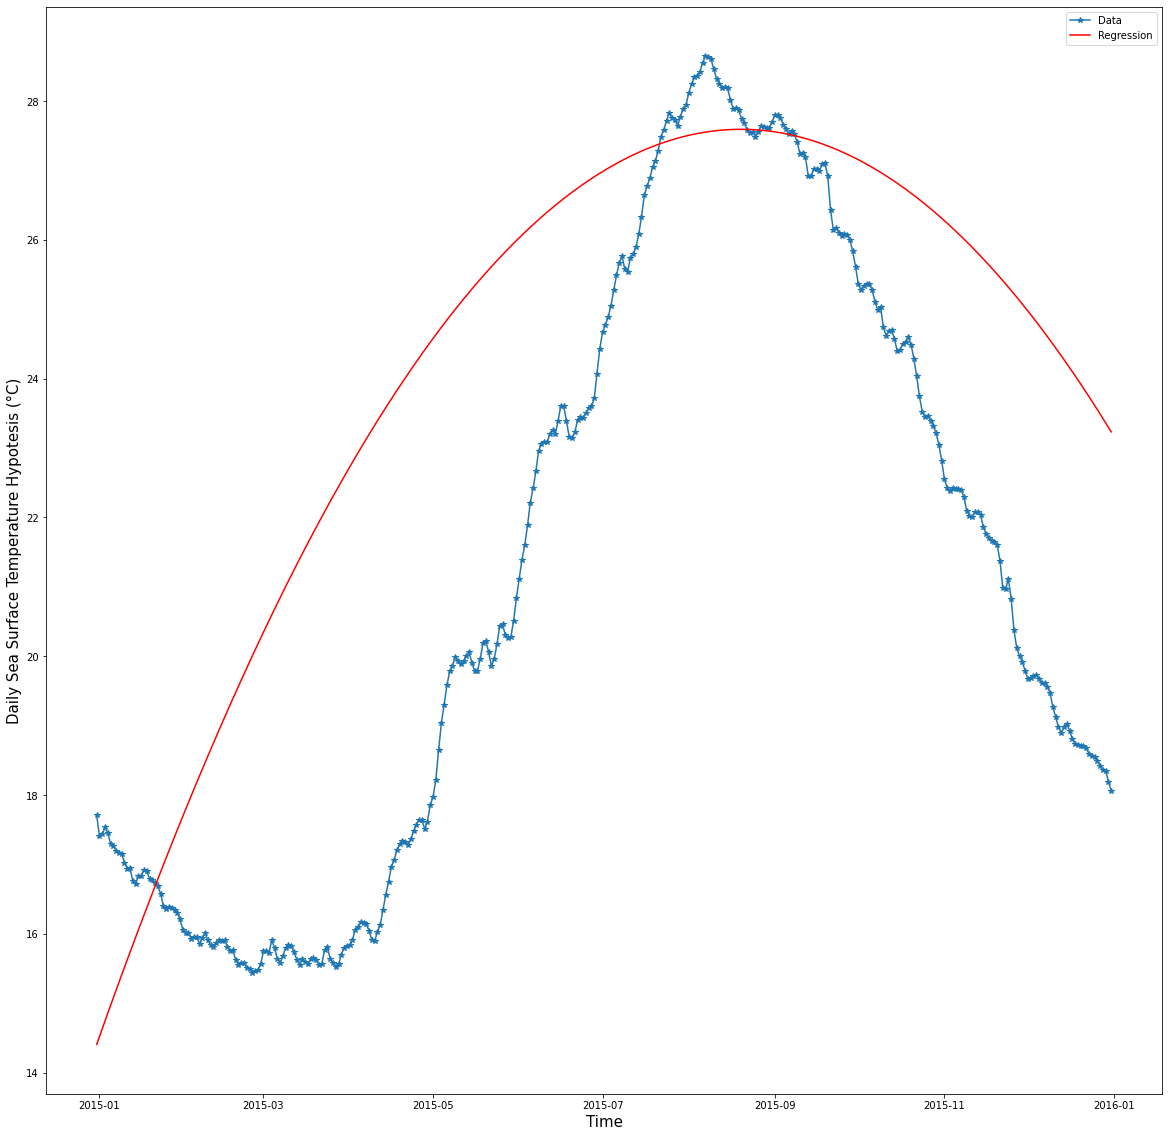

In [ ]:
plot_ts(output4.time,output4.mean_sst,'-*','Daily Sea Surface Temperature (°C)')
plot_ts(output4.time,SST,'r','Daily Sea Surface Temperature Hypotesis (°C)')
legend({'Data','Regression'})

la corrélation est de 0.8086002857707407


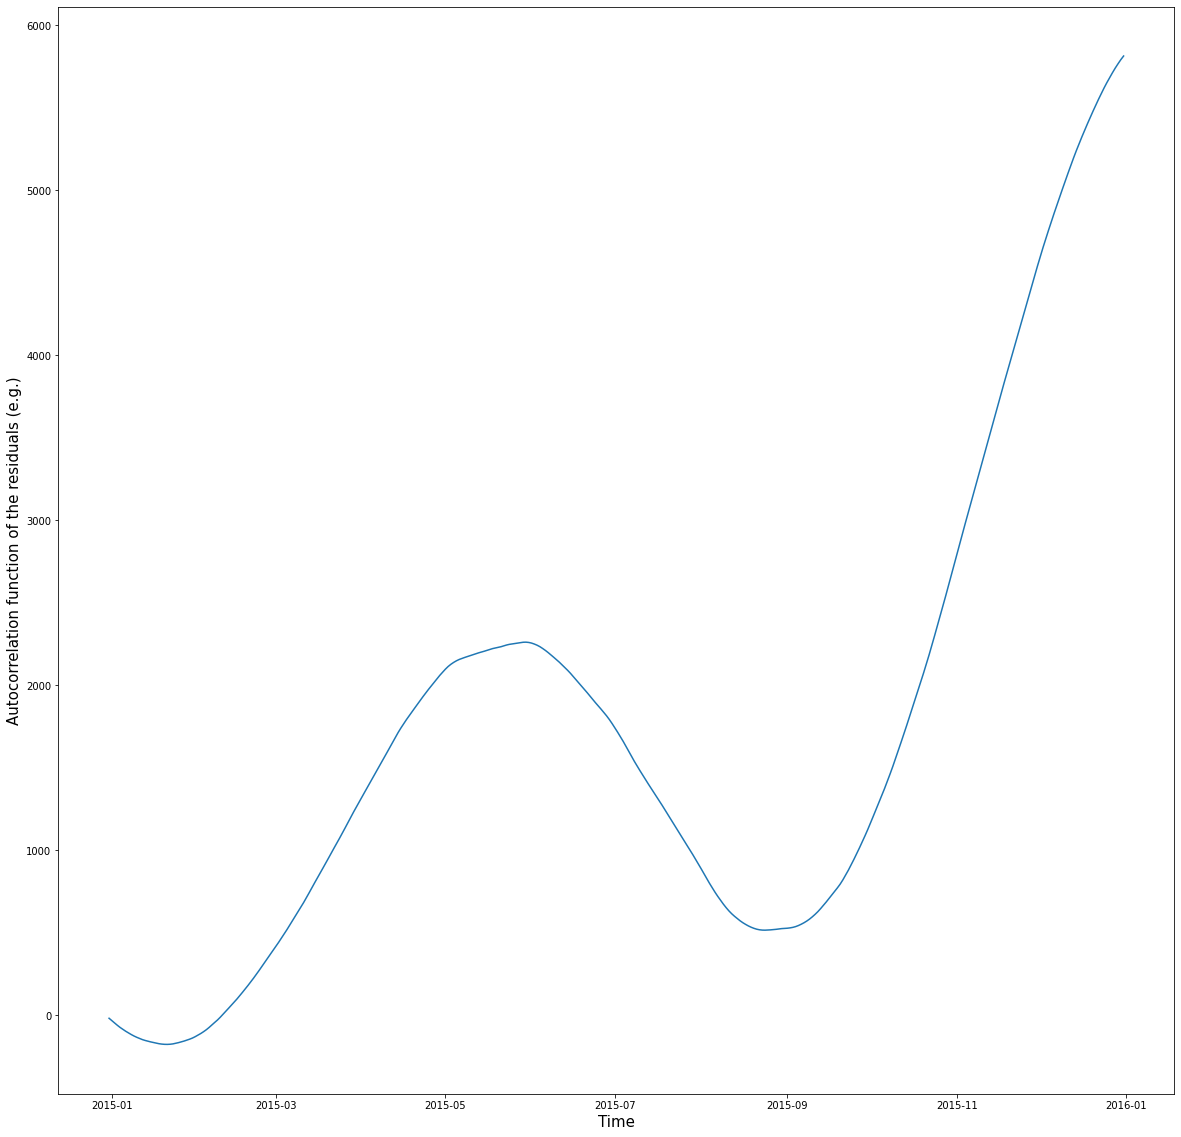

In [ ]:
print("la corrélation est de", np.corrcoef(output4.mean_sst, SST)[0,1])
residuals = SST - output4.mean_sst.to_numpy()
result = np.correlate(residuals, residuals, mode="full")
plot_ts(output4.time, result[:366], '-', "Autocorrelation function of the residuals (e.g.)")

COMMENT:
Sur la première courbe on voit le résultat d'une régression linéaire multivariable avec le module OLS de sklearn. Qui reprend l'allure générale de la courbe sans être très fidèle. ON obtient tout de même une corrélaion de 0.8 entre les deux, ce qui peut être considéré comme satisfaisant. 
La seconde courbe est l'autocorrélation de la différence entre les deux courbes, on remarque que quand la différence est faible, le  coefficient de cette courbe l'est aussi. Il ne s'agit pas là de la meilleur estimation possible mais d'une tendance sur l'année qui pourrait être reporté à une autre à une autre année (future) dans l'idée d'estimer les températures possibles.

**QUESTION 5**: Compute the SSH difference between the first day in 2011 and the last day in 2015 for each location in the globe. Then, plot the map of this SSH difference: it shows the sea level rise. Finally, adjust a regression to model the tendancy of the global mean sea level rise (averaged over all the location) and plot the prediction for the horizon 2100.

In [ ]:
# Question 5
# Mean of ssh above 3O days i.e. a lunar cycle duration
%%bigquery --project alert-ground-261008 output5
SELECT y1.lon, 
       y1.lat, 
       y1.y2011 AS ssh2011, 
       y2.y2015 AS ssh2015, 
       y2.y2015-y1.y2011 AS diff, 
       #(y2.y2015-y1.y2011)/(735598.0-30-734138.0) AS a, 
       #y1.y2011-((y2.y2015-y1.y2011)/(735598.0-30-734138.0))*734138.0 as b, 
       (y2.y2015-y1.y2011)/(735598.0-30-734138.0)*766645.0+y1.y2011-((y2.y2015-y1.y2011)/(735598.0-30-734138.0))*734138.0 as ssh2100
FROM (
  SELECT lon, lat, AVG(ssh) AS y2011
  FROM bdo2020.bdo2020.2011_2015
  WHERE time between 734138.0 AND 734138.0+30
  GROUP BY lon, lat
) AS y1
INNER JOIN (
  SELECT lon, lat, AVG(ssh) AS y2015
  FROM bdo2020.bdo2020.2011_2015
  WHERE time between 735598.0-30 AND 735598.0
  GROUP BY lon, lat
) AS y2 ON y2.lon = y1.lon AND y2.lat = y1.lat


In [ ]:
# sample of the dataframe
output5

In [ ]:
output5 = transpose(nan_to_num(output5))

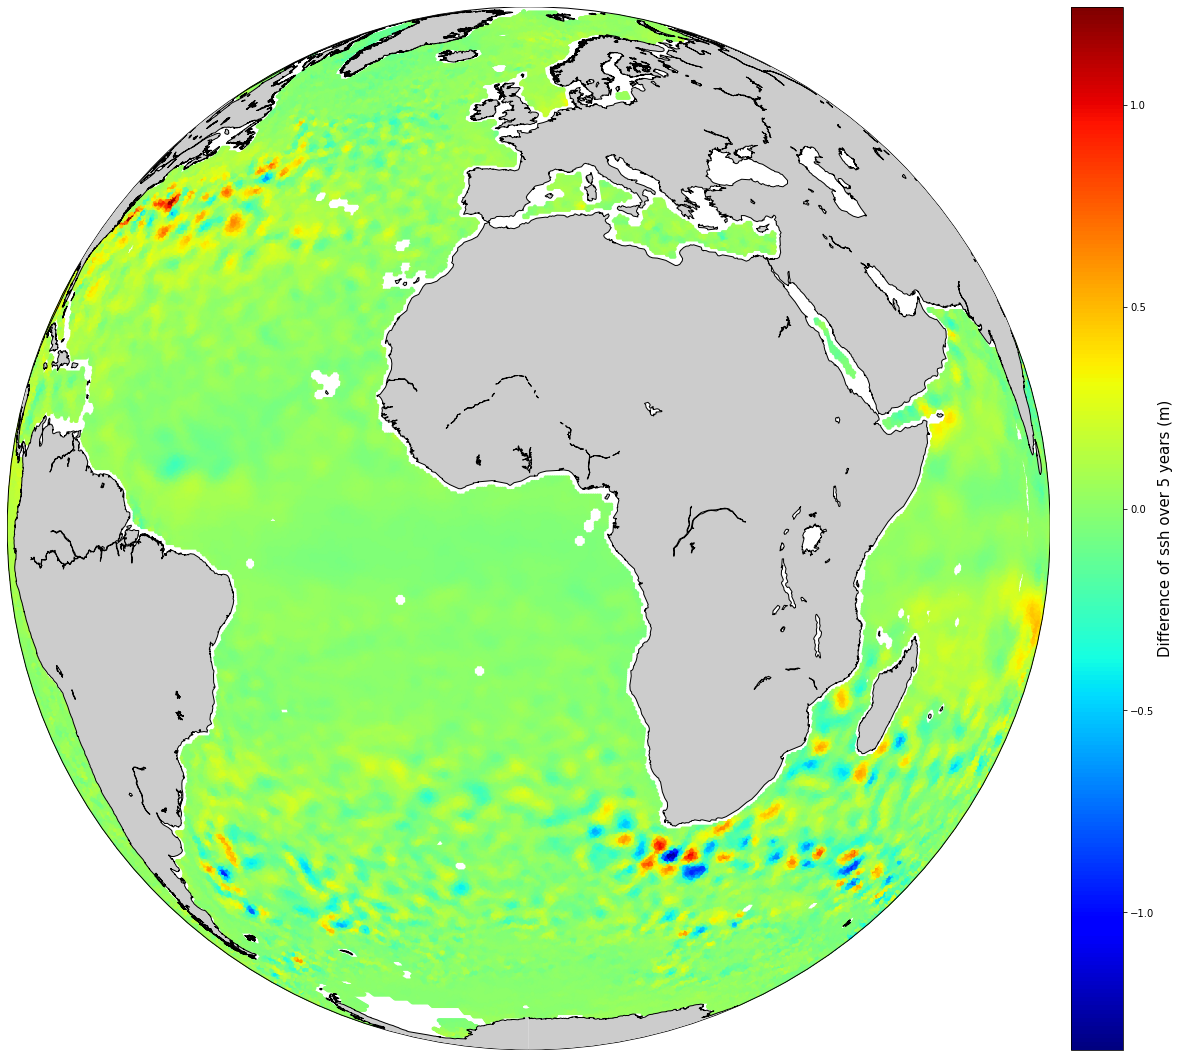

In [ ]:
plot_im(output5[0], output5[1], output5[4],15,'Difference of Sea Level between 2011 and 2015 (m)')

COMMENT:
La différence de température entre 2011 et 2015 donne quelque chose de relativement proche de 0 uniformement avec une tendance à l'augmentation de manière générale.


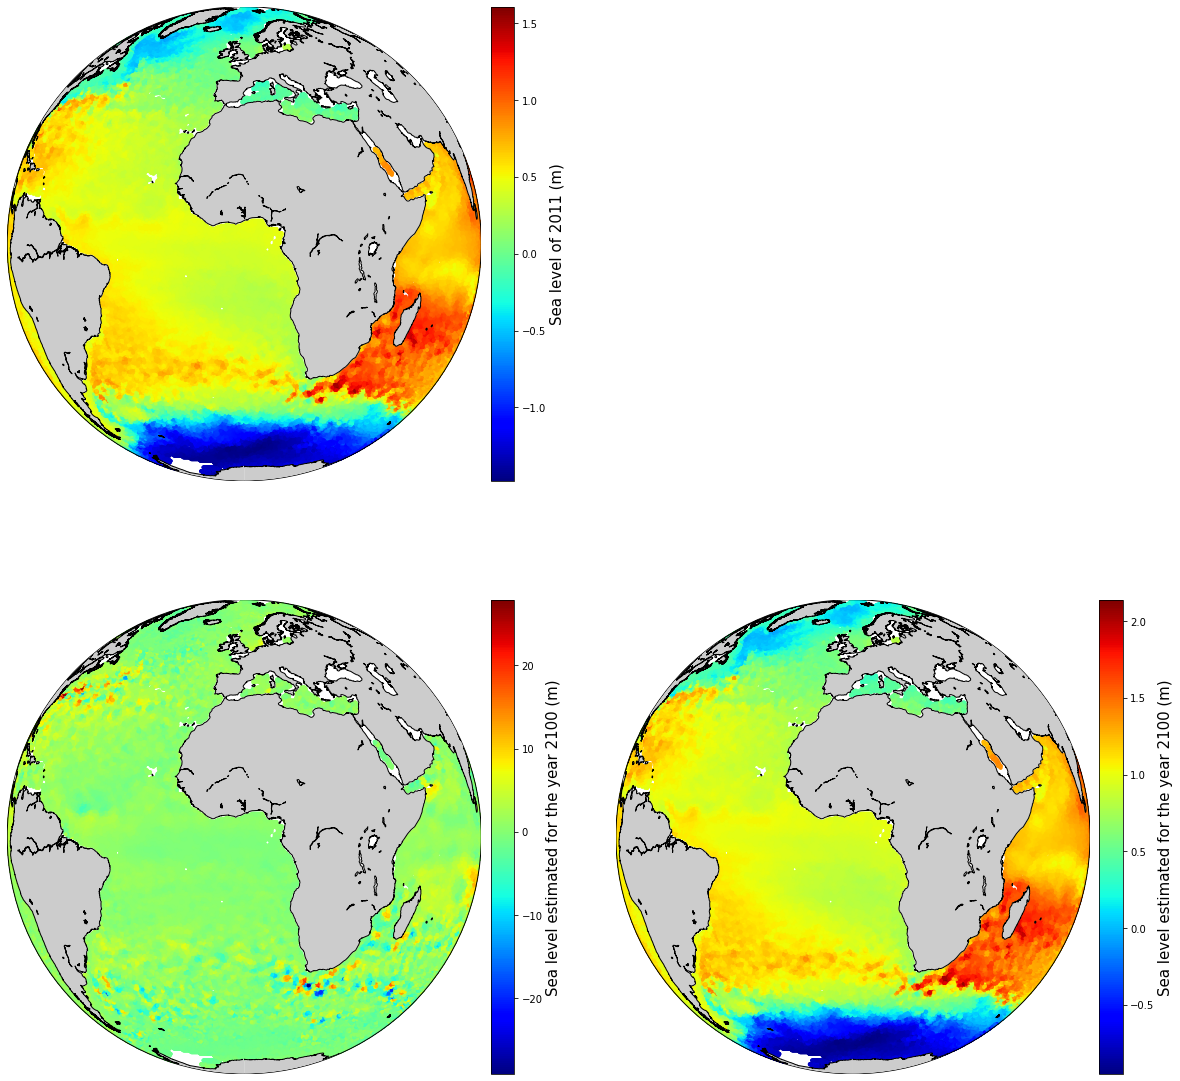

In [ ]:
figure()
subplot(2,2,1)
plot_im(output5[0], output5[1], output5[2],15,'Sea level of 2011 (m)')
#linear regression on each point
subplot(2,2,3)
plot_im(output5[0], output5[1], output5[5],15,'Sea level estimated for the year 2100 (m)')
#2011 + mean of diff between 2011 and 2100
subplot(2,2,4)
plot_im(output5[0], output5[1], output5[2]+0.5301109883288051,15,'Sea level estimated for the year 2100 (m)')


COMMENT:




In [ ]:
# régression de la forme at+b (avec moyenne mondiale avant régression)
diff = mean(output5[5])-mean(output5[2])
print("Average sea level rise estimated between 2011 and 2100 is ",diff,"m.")
print("La corrélation est de", np.corrcoef(output5[5], output5[2]+0.530110988328805)[0,1])

Average sea level rise estimated between 2011 and 2100 is  0.5301109883288051 m.
La corrélation est de 0.22964627709939028


COMMENT: 
Pour estimer la hauteur de l'eau en 2100, nous avons appliquer deux méthodes: la première étant de faire une régression linéaire sur la moyenne annuelle mondiale ce qui nous a permis d'obtenir un profil de température similaire a celui que nous connaissons actuellement masi avec un augentation de 0.53 °C.
La deuxième méthode est une regression linéaire sur la moyenne annuelle en chaque point. Cette deuxième méthode donne une map proche de celle des différences entre 2011 et 2015 mais avec une échelle diférente.
Mais cela permet dans les deux cas de signifier une hausse du niveau de l'océan dans les années à venir, à notre échelle et avec les données que nous disposons.